<a href="https://colab.research.google.com/github/pranabsarma18/MLZoomcamp-2022/blob/main/MLZoomcamp_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


##EDA

*   Load the data.
*   Look at the "median_house_value" variable. Does it have a long tail?

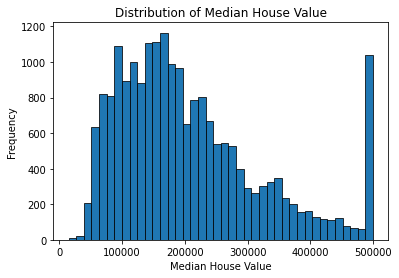

In [20]:
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, bins=40, alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Median House Value')
plt.title('Distribution of Median House Value')

plt.show()

In [12]:
df = df[['latitude','longitude','housing_median_age','total_rooms','total_bedrooms',
        'population','households','median_income','median_house_value']]

In [13]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


##Question 1
Find a feature with missing values. How many missing values does it have?

In [17]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

##Question 2
What's the median (50% percentile) for variable 'population'?

In [36]:
df["population"].median()

1166.0

##Split the data


*   Shuffle the initial dataset, use seed 42.
*   Split your data in train/val/test sets, with 60% / 20% / 20% distribution.
*   Make sure that the target value ('median_house_value') is not in your  dataframe.
*   Apply the log transformation to the median_house_value variable using the np.log1p() function.


##Validation framework

In [21]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [22]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [24]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801
20484,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376
9814,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250


##Linear Regression

In [25]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

##Baseline solution

In [32]:
def prepare_X_zero_as_missing_value(df):
    df_num = df.copy()
    df_num = df_num.fillna(0) # Filling missing value with 0
    X = df_num.values
    return X
def prepare_X_mean_as_missing_value(df):
    mean_total_bedrooms = df_train["total_bedrooms"].mean()
    df_num = df.copy()
    df_num = df_num.fillna(mean_total_bedrooms) # Filling missing value with mean
    X = df_num.values
    return X

In [33]:
X_train1 = prepare_X_zero_as_missing_value(df_train)
w1_0, w1 = train_linear_regression(X_train1, y_train)

X_train2 = prepare_X_mean_as_missing_value(df_train)
w2_0, w2 = train_linear_regression(X_train2, y_train)

In [34]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [35]:
X_val1 = prepare_X_zero_as_missing_value(df_val)
y_pred1 = w1_0 + X_val1.dot(w1)
rmse1 = rmse(y_val, y_pred1)

X_val2 = prepare_X_mean_as_missing_value(df_val)
y_pred2 = w2_0 + X_val2.dot(w2)
rmse2 = rmse(y_val, y_pred2)

print("RMSE with zero as missing value:", rmse1)
print("RMSE with mean as missing value:", rmse2)

RMSE with zero as missing value: 0.32953303652279736
RMSE with mean as missing value: 0.32901954390060323


##Regularization

In [37]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [39]:
X_train = prepare_X_zero_as_missing_value(df_train)
X_val = prepare_X_zero_as_missing_value(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.3295330361648335
0.0001 0.32953300097043065
 0.001 0.32953270386694516
  0.01 0.3295319365992662
   0.1 0.32969472053971893
     1 0.333788722000439
     5 0.33924853455059095
    10 0.3406063807809605


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)


In [50]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
RMSE_scores = []
for s in seeds:
  np.random.seed(s)
  n = len(df)
  
  n_val = int(0.2 * n)
  n_test = int(0.2 * n)
  n_train = n - (n_val + n_test)

  idx = np.arange(n)
  np.random.shuffle(idx)

  df_shuffled = df.iloc[idx]

  df_train = df_shuffled.iloc[:n_train].copy()
  df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
  df_test = df_shuffled.iloc[n_train+n_val:].copy()

  y_train_orig = df_train.median_house_value.values
  y_val_orig = df_val.median_house_value.values
  y_test_orig = df_test.median_house_value.values

  y_train = np.log1p(df_train.median_house_value.values)
  y_val = np.log1p(df_val.median_house_value.values)
  y_test = np.log1p(df_test.median_house_value.values)

  del df_train['median_house_value']
  del df_val['median_house_value']
  del df_test['median_house_value']

  X_train = prepare_X_zero_as_missing_value(df_train)
  X_val = prepare_X_zero_as_missing_value(df_val)

  w_0, w = train_linear_regression(X_train, y_train)
  y_pred = w_0 + X_val.dot(w)
  rmse_value = rmse(y_val, y_pred)
  RMSE_scores.append(rmse_value)
  print(s, rmse_value)

0 0.3388430480530326
1 0.33623872559566276
2 0.3320912318833194
3 0.34051536090377893
4 0.33890240665742954
5 0.34348667257187443
6 0.34519809530991635
7 0.3395989927407549
8 0.34662308731992736
9 0.3365926124190451


In [51]:
round(np.std(RMSE_scores),3)

0.004

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

In [57]:
np.random.seed(9)
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_train = np.concatenate((y_train,y_val), axis = 0)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

df_train = pd.concat([df_train, df_val])
X_train = prepare_X_zero_as_missing_value(df_train)
X_test = prepare_X_zero_as_missing_value(df_test)

w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_test.dot(w)
rmse_value = rmse(y_test, y_pred)
print(rmse_value)

0.34531495071792356
